In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

# Parameter

In [2]:
t_end = 300
r_0 = 3.2
switch_flock_immunity = True
total_population = 80e6
aRF = 0.7
w = [0, 0.1, 0.2, 0.4, 0.2, 0.1]
w.reverse()
tau_report = 10


# Synthetic data

Create synthetic data. For creating the synthetic data, the delay pattern reported in _A. Azmon, et al. On the estimation of the reproduction number based on misreported epidemicdata.Statistics in Medicine_ or are extracted by the functionality provided in extract_true_delay_pattern.

In [10]:
def create_data(report_delay_pattern, r_steps, t_steps, delay=7):
    RNF = r_0 * np.ones(shape=(t_end))
    for i, r_step in enumerate(r_steps):
        RNF[t_steps[i] - 1: t_end] = r_step
    R = RNF
    n_new_cases = np.zeros(t_end)
    n_new_cases[:len(w)] = [1, 2, 2, 3, 3, 4]
    n_report = np.zeros(t_end)
    dot_product =  np.zeros(t_end)
    df = pd.DataFrame(columns=["k", "New cases (True)", "Nowcasting", "reported cases", "delayed", "true R", "Dot_product"])

    for k in range(len(w), t_end):
        R[k] = aRF * R[k - 1] + (1 - aRF) * RNF[k]

        dot_product[k] = np.dot(n_new_cases[k - len(w): k], w)
        n_new_cases[k] = np.round(R[k] * np.dot(n_new_cases[k - len(w): k], w))
        n_nowcasting = n_new_cases[k]
        delayed = 0

        if k - len(w) >= 0:
            n_report[k] = n_new_cases[k - tau_report]
            temp_result = 0
            for j in range(report_delay_pattern.shape[-1]):
                temp_result += n_new_cases[k - j] * report_delay_pattern[(k - j) % 7, j]
            delayed = round(temp_result)

        df = df.append(pd.DataFrame([[k + 1, int(n_new_cases[k]), int(n_nowcasting), int(n_report[k]), int(delayed), R[k], dot_product[k]]], columns=df.columns),
                       ignore_index=True)
    return df

# 1-day delay pattern

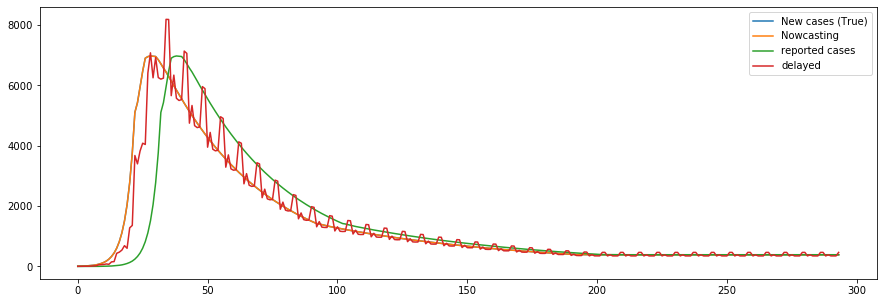

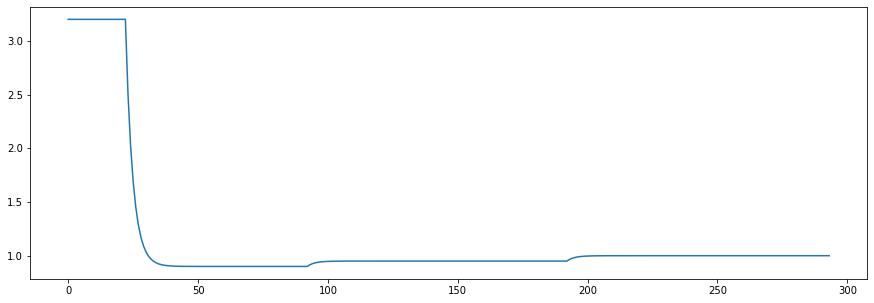

In [11]:
report_delay_pattern = np.array([
    [1-0.4,0, 0, 0, 0, 0, .5],
    [.4, 1-.5 ,0 , 0, 0, 0, 0],
    [0, .5, 1-.7, 0, 0, 0, 0],
    [0, 0, .7, 1-.3, 0, 0, 0],
    [0, 0, 0, .3, 1-.4, 0, 0],
    [0, 0, 0, 0, .4, 1-.6, 0],
    [0, 0, 0, 0, 0, .6, 1-.5],
])
    
df[["New cases (True)", "Nowcasting", "reported cases", "delayed"]].plot(figsize=(15,5))
plt.show()
df["true R"].plot(figsize=(15,5))
plt.show()
df.to_csv("synth_0.9_0.95_1_day.csv", sep=";", index = False,  float_format='%.2f')


# 2-days delay pattern

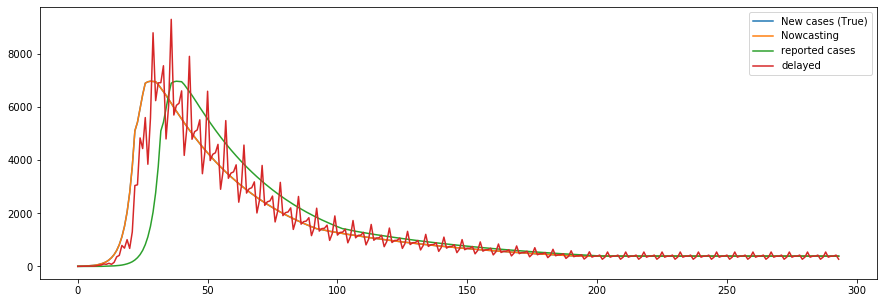

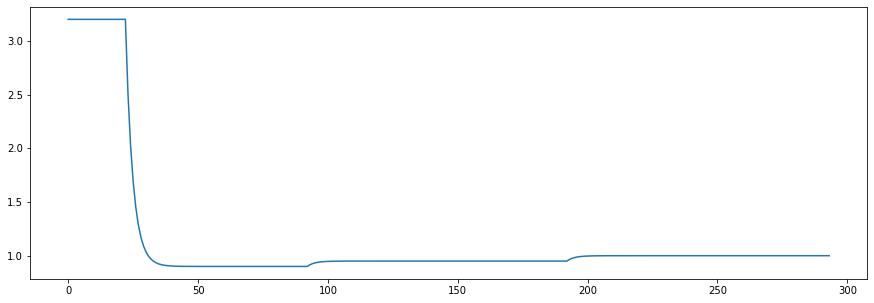

In [14]:
# 2 day
report_delay_pattern = np.array([
    [1 - .4 -.3, 0, 0, 0, 0, .3, .3],
    [0.3, 1 - .3 -.4, 0, 0, 0, 0, .6],
    [.4, .4, 1 - 0.3 -.4, 0, 0, 0, 0],
    [0, .3, .3, 1 -.5 -.3, 0, 0, 0],
    [0, 0, .4, .5, 1 - .3 - .4, 0, 0],
    [0, 0, 0, .3, .3, 1-.5-.3, 0],
    [0, 0, 0, 0, .4, .5, 1-.3-.6],
])

df = create_data(report_delay_pattern, [0.9, 0.95, 1], [30,100, 200], False)
df[["New cases (True)", "Nowcasting", "reported cases", "delayed"]].plot(figsize=(15,5))
plt.show()

df["true R"].plot(figsize=(15,5))
plt.show()
df.to_csv("synth_0.9_0.95_1_2day.csv", sep=";", index = False,  float_format='%.2f')


# Weekend Delay Pattern

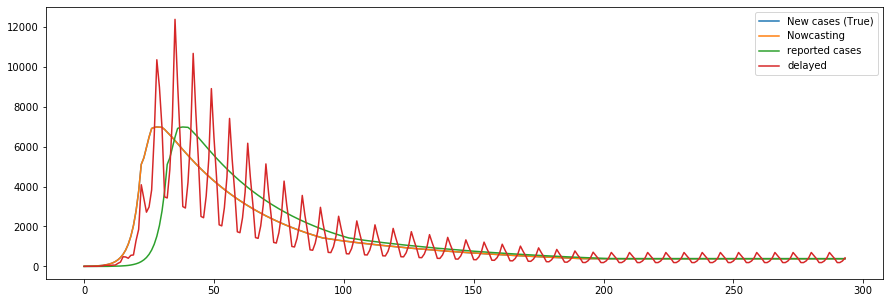

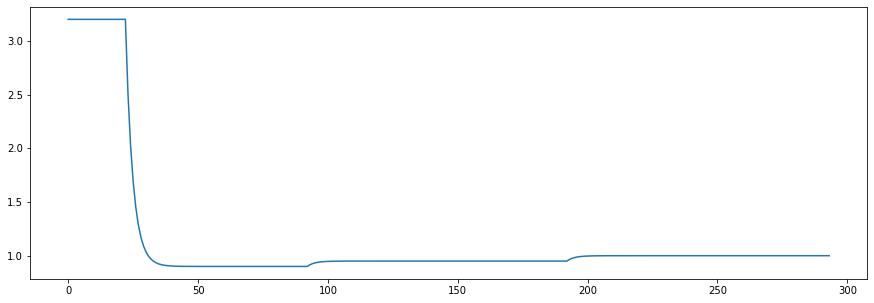

In [17]:
# Weekend
report_delay_pattern = np.array([
    [1 - 0.4, 0, 0, 0, 0.4, 1 - 0.6, 1 - 0.5],
    [0.4, 1 - 0.5, 0, 0, 0, 0.6, 0.5],
    [0, 0.5, 1 - 0.7, 0, 0, 0, 0],
    [0, 0, 0.7, 1 - 0.3, 0, 0, 0],
    [0, 0, 0, 0.3, 1 - 0.4, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
])

df = create_data(report_delay_pattern, [0.9, 0.95, 1], [30,100, 200])
df[["New cases (True)", "Nowcasting", "reported cases", "delayed"]].plot(figsize=(15,5))
plt.show()
df["true R"].plot(figsize=(15,5))
plt.show()
df.to_csv("synth_0.9_0.95_1_weekend.csv", sep=";", index = False,  float_format='%.2f')

# Synthetic data with true delay patterns
The delay patterns are extract with the notepad extract_true_delay_pattern.ipynb

In [21]:
true_delay_pattern = pd.read_csv("true_delay_pattern.csv")


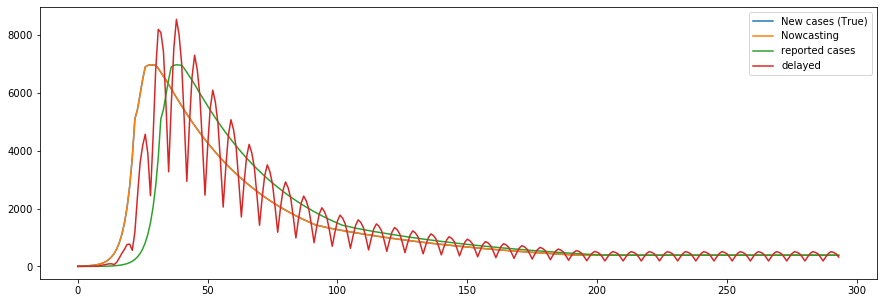

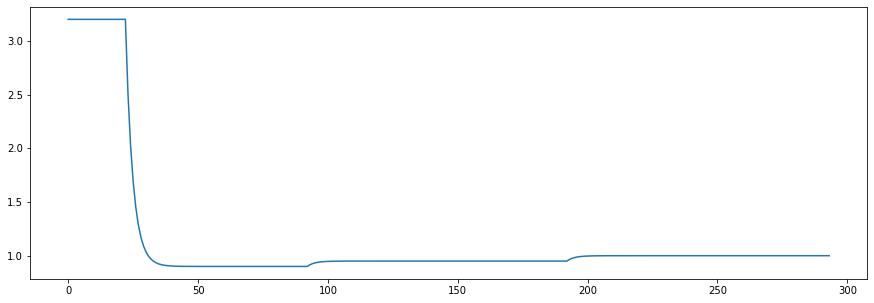

In [24]:
delay_pattern = true_delay_pattern["AnzahlFall"].values.reshape((7,14))
#delay_pattern =np.concatenate([delay_pattern[::2], delay_pattern[1::2]]).transpose()
df = create_data(delay_pattern, [0.9, 0.95, 1], [30,100, 200], delay=14)
df[["New cases (True)", "Nowcasting", "reported cases", "delayed"]].plot(figsize=(15,5))
plt.show()
df["true R"].plot(figsize=(15,5))
plt.show()
df.to_csv("synth_german_real_delay.csv", sep=";", index = False,  float_format='%.2f')